http://aidiary.hatenablog.com/entry/20161109/1478696865


https://github.com/aidiary/keras-examples/blob/master/mlp/mnist.py

In [1]:
import time
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

from IPython.display import SVG

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


In [2]:
# load mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 画像を1次元配列化
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [4]:
# 画素を0.0-1.0の範囲に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

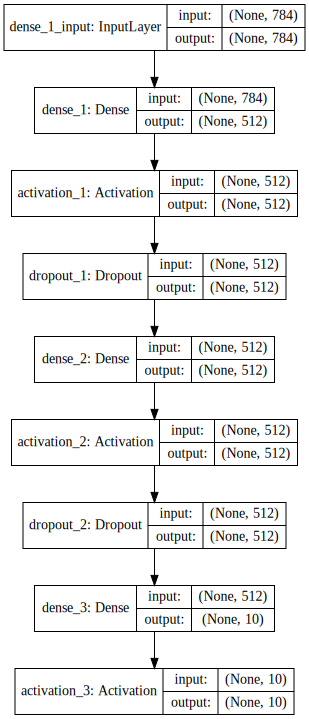

In [6]:
# create model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

print(model.summary())
SVG(model_to_dot(model=model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [7]:
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

In [8]:
# callback func EarlyStopping
early_stopping = EarlyStopping(patience=0, verbose=1)

In [9]:
# fit-model
st = time.time()

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

ed = time.time()
elapsed_time = ed-st
print("ELAPSED_TIME：", elapsed_time, " 秒")

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 15s 275us/step - loss: 0.2730 - acc: 0.9170 - val_loss: 0.0967 - val_acc: 0.9720
Epoch 2/12
54000/54000 [==============================] - 16s 297us/step - loss: 0.1120 - acc: 0.9658 - val_loss: 0.0771 - val_acc: 0.9750
Epoch 3/12
54000/54000 [==============================] - 15s 271us/step - loss: 0.0782 - acc: 0.9755 - val_loss: 0.0814 - val_acc: 0.9748
Epoch 00003: early stopping
ELAPSED_TIME： 45.95872354507446  秒


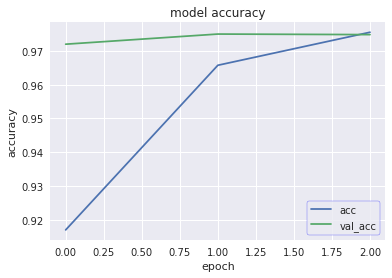

In [10]:
#精度の履歴
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='best', frameon=True, edgecolor="blue")
plt.show()

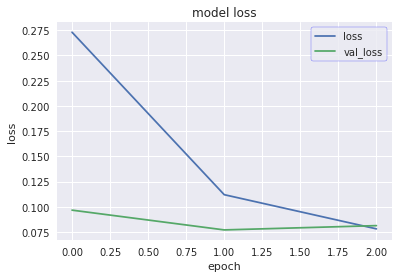

In [11]:
#損失の履歴
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='best', frameon=True, edgecolor="blue")
plt.show()

In [12]:
# モデルの評価
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Test loss: 0.08309154215664603
Test acc: 0.9739
